In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

D:\Python3.10\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Ship Category	Ship Code
# Cargo	1
# Military	2
# Carrier	3
# Cruise	4
# Tankers	5

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Random images of class 1

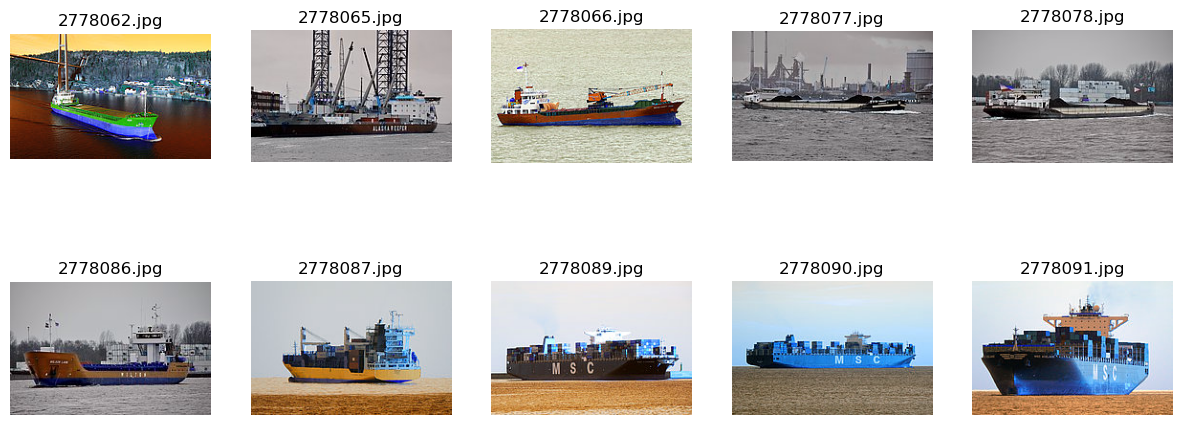

In [9]:
import cv2
import matplotlib.pyplot as plt
import os

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

images = os.listdir("Data\\1\\")
for i in range(10):
    img = cv2.imread('Data\\1\\'+images[i])
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(images[i])
    axs[i].axis('off')

plt.show()


#### Applied Laplacian filter to the image
- #### Laplacian filter is a second derivative edge detection filter
- #### It is used to find edges in an image
- #### It is very sensitive to noise
- #### It is used to sharpen an image
- #### It is used to detect edges in an image
- #### It is used to enhance edges in an image

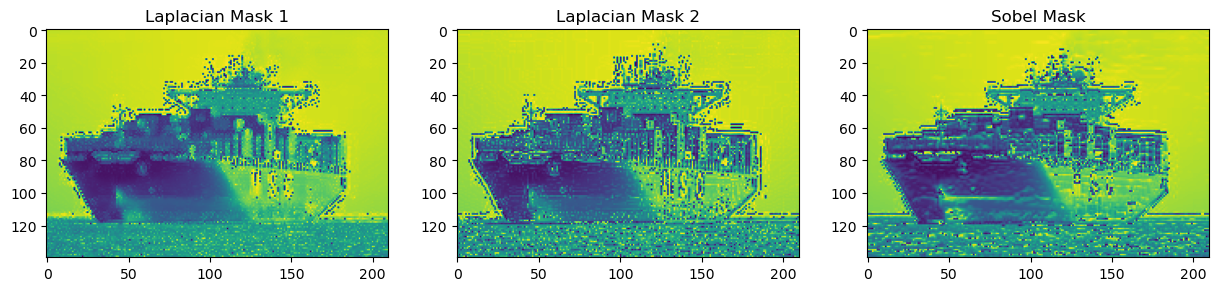

In [10]:
def applyLaplacian(laplacianMask, img):
    filteredImg = cv2.filter2D(img, -1, laplacianMask)
    finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))
    return finalImg
  
def applySobel(sobelMask, img):
    filteredImg = cv2.filter2D(img, -1, sobelMask)
    finalImg = np.uint8(np.clip(img + filteredImg, 0, 255))  
    return finalImg


img = cv2.imread('Data//1//2778091.jpg',0)

laplacianMask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])  
final_img = applyLaplacian(laplacianMask, img)

laplacianMask2 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
final_img2 = applyLaplacian(laplacianMask2, img)

sobelMask = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
final_img3 = applySobel(sobelMask, img)

fig, axs = plt.subplots(1, 3, figsize=(15, 6))
axs[0].imshow(final_img)
axs[0].set_title('Laplacian Mask 1')
axs[1].imshow(final_img2)
axs[1].set_title('Laplacian Mask 2')
axs[2].imshow(final_img3)
axs[2].set_title('Sobel Mask')
plt.show()


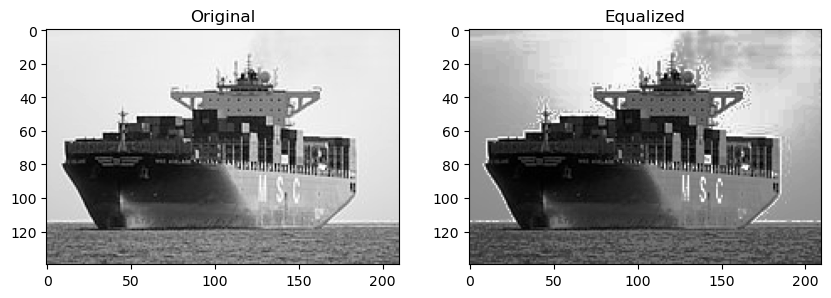

In [11]:
def hist_equalization(img):
    img = cv2.equalizeHist(img)
    return img

# 2778062

img = cv2.imread('Data//1//2778091.jpg', 0) 
# img = cv2.resize(img, (224, 224))
equ = hist_equalization(img)  

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.subplot(122)
plt.imshow(equ, cmap='gray')
plt.title('Equalized')
plt.show()


# Using Traditional Machine Learning Algorithm

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [6]:
# without any preprocessing
def load_and_preprocess_data(data_dir):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)
    
    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)        
        count = 0
        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(class_path, filename)
                img = cv2.imread(image_path)
                img = cv2.resize(img, (224, 224))
                img = np.array(img)
                img = img / 255.0
                img = img.flatten()
                images.append(img)
                labels.append(class_folder)
                count+=1
            if count == 500:
                break

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

data_dir = 'Data'
images, labels = load_and_preprocess_data(data_dir)
print(images[0].shape)
print(len(labels))

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels)

(150528,)
2500


In [8]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, ypred))
print("Classification Report:", classification_report(y_test, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))

Accuracy: 0.5026666666666667
Classification Report:               precision    recall  f1-score   support

           1       0.40      0.31      0.35       150
           2       0.45      0.49      0.47       150
           3       0.65      0.57      0.61       150
           4       0.52      0.70      0.60       150
           5       0.48      0.45      0.47       150

    accuracy                           0.50       750
   macro avg       0.50      0.50      0.50       750
weighted avg       0.50      0.50      0.50       750

Confusion Matrix:
 [[ 46  31   9  30  34]
 [ 16  73   9  42  10]
 [ 14  24  85   9  18]
 [  6  14  13 105  12]
 [ 33  19  14  16  68]]


In [9]:
# applying laplacian mask 1
def load_and_preprocess_data(data_dir):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder) 
        count = 0
        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(class_path, filename)
                img = cv2.imread(image_path)
                img = applyLaplacian(laplacianMask,img)
                img = cv2.resize(img, (224, 224))
                img = np.array(img)
                img = img / 255.0 
                img = img.flatten()
                
                images.append(img)
                labels.append(class_folder)
                count+=1
            if count == 500:
                break
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

data_dir = 'Data'
images, labels = load_and_preprocess_data(data_dir)
print(images[0].shape)
print(len(labels))

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels)

(150528,)
2500


In [10]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train, y_train)
ypred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, ypred))
print("Classification Report:", classification_report(y_test, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))

Accuracy: 0.488
Classification Report:               precision    recall  f1-score   support

           1       0.41      0.31      0.36       150
           2       0.44      0.54      0.48       150
           3       0.61      0.51      0.55       150
           4       0.50      0.62      0.55       150
           5       0.49      0.46      0.48       150

    accuracy                           0.49       750
   macro avg       0.49      0.49      0.48       750
weighted avg       0.49      0.49      0.48       750

Confusion Matrix:
 [[47 33 14 21 35]
 [17 81 10 35  7]
 [18 17 76 13 26]
 [19 30  5 93  3]
 [13 25 19 24 69]]


# Deep Learning and Transfer Learning without applying the laplacian filter

In [13]:
def load_and_preprocess_data(data_dir):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        count = 0
        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(class_path, filename)
                img = cv2.imread(image_path)
                img = cv2.resize(img, (224, 224))  
                img = np.array(img)
                img = img / 255.0 
                images.append(img)
                labels.append(class_folder)
                count+=1
            if count == 500:
                break
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [14]:
data_dir = 'Data'
images, labels = load_and_preprocess_data(data_dir)

In [15]:
print(images[0].shape)

(224, 224, 3)


In [16]:
print(len(labels))

2500


In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

encoded_labels[0:10]
# classes = [4,3,2,1]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Resnet 

In [29]:
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models

In [56]:
# model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# model.trainable = False

# inp = layers.Input(shape=(32, 32, 3))
# layer = model(inp, training=False)
# layer = layers.GlobalAveragePooling2D()(layer)
# layer = layers.Dense(128, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
# # layer = layers.Dense(64, activation='relu')(layer)
# # layer = layers.Dropout(0.5)(layer)
# # layer = layers.Dense(32, activation='relu')(layer)
# # layer = layers.Dropout(0.5)(layer)
# # layer = layers.Dense(32, activation='relu')(layer)
# # layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(5, activation='softmax')(layer)
# model = tf.keras.Model(inp, layer)



# lr = 0.0001
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [32]:
# model.summary()

In [34]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report


# X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.3, stratify=encoded_labels)

In [33]:
# model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size = 100)

In [34]:
# ypred = np.argmax(model.predict(X_test),axis=1)
# print("Accuracy:",accuracy_score(y_test, ypred))
# print("Classification Report:\n", classification_report(y_test, ypred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))

#### CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
# from IPython.display import SVG
# from keras.utils.vis_utils import model_to_dot
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
!pip install --upgrade keras tensorflow

In [19]:
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.3, stratify=encoded_labels)

In [20]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size = 100)

Epoch 1/10
18/18 [==============================] - 86s 4s/step - loss: 2.3811 - accuracy: 0.2240 - val_loss: 1.5517 - val_accuracy: 0.2973
Epoch 2/10
18/18 [==============================] - 68s 4s/step - loss: 1.4875 - accuracy: 0.3611 - val_loss: 1.3903 - val_accuracy: 0.4720
Epoch 3/10
18/18 [==============================] - 67s 4s/step - loss: 1.3731 - accuracy: 0.4406 - val_loss: 1.2721 - val_accuracy: 0.4800
Epoch 4/10
18/18 [==============================] - 67s 4s/step - loss: 1.2299 - accuracy: 0.5069 - val_loss: 1.1975 - val_accuracy: 0.5200
Epoch 5/10
18/18 [==============================] - 75s 4s/step - loss: 1.1253 - accuracy: 0.5571 - val_loss: 1.2054 - val_accuracy: 0.5387
Epoch 6/10
18/18 [==============================] - 67s 4s/step - loss: 1.0241 - accuracy: 0.6080 - val_loss: 1.0787 - val_accuracy: 0.5827
Epoch 7/10
18/18 [==============================] - 64s 4s/step - loss: 0.9053 - accuracy: 0.6606 - val_loss: 1.0840 - val_accuracy: 0.6173
Epoch 8/10
18/18 [==

## using laplacian filter

In [23]:
# Loading the data 
def load_and_preprocess_data(data_dir,laplacianMask):
    images = []
    labels = []
    class_folders = os.listdir(data_dir)

    for class_folder in class_folders:
        class_path = os.path.join(data_dir, class_folder)
        count = 0
        for filename in os.listdir(class_path):
            if filename.endswith('.jpg'):
                image_path = os.path.join(class_path, filename)
                img = cv2.imread(image_path)
                img = applyLaplacian(laplacianMask, img)
                img = cv2.resize(img, (224, 224))  
                img = np.array(img)
                img = img / 255.0  
                images.append(img)
                labels.append(class_folder)
                count+=1
            if count==500:
                break

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [24]:
data_dir = 'Data'
images_1, labels_1 = load_and_preprocess_data(data_dir,laplacianMask)

In [25]:
print(images_1[0].shape)
print(len(labels_1))

(224, 224, 3)
2500


In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_labels_1 = label_encoder.fit_transform(labels_1)

print(encoded_labels_1[0:10])
# classes = [4,3,2,1]


[0 0 0 0 0 0 0 0 0 0]


#### Resnet

In [64]:
# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models

In [62]:
# model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# model.trainable = False

# inp = layers.Input(shape=(32, 32, 3))
# layer = model(inp, training=False)
# layer = layers.GlobalAveragePooling2D()(layer)
# layer = layers.Dense(128, activation='relu')(layer)
# layer = layers.Dropout(0.5)(layer)
# # layer = layers.Dense(64, activation='relu')(layer)
# # layer = layers.Dropout(0.5)(layer)
# # layer = layers.Dense(32, activation='relu')(layer)
# # layer = layers.Dropout(0.5)(layer)
# # layer = layers.Dense(32, activation='relu')(layer)
# # layer = layers.Dropout(0.5)(layer)
# layer = layers.Dense(5, activation='softmax')(layer)
# model = tf.keras.Model(inp, layer)



# lr = 0.0001
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [1]:
# model.summary()

In [27]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(images_1, encoded_labels_1, test_size=0.3, stratify=encoded_labels_1)

In [2]:
# model.fit(X_train_1, y_train_1, epochs=100, validation_data=(X_test_1, y_test_1), batch_size = 100)

In [3]:
# ypred = np.argmax(model.predict(X_test_1),axis=1)
# print("Accuracy:",accuracy_score(y_test_1, ypred))
# print("Classification Report:\n", classification_report(y_test_1, ypred))
# print("Confusion Matrix:\n", confusion_matrix(y_test_1, ypred))

In [4]:
# model.fit(X_train_2, y_train_2, epochs=100, validation_data=(X_test_2, y_test_2), batch_size = 100)

In [5]:
# ypred = np.argmax(model.predict(X_test_2),axis=1)
# print("Accuracy:",accuracy_score(y_test_2, ypred))
# print("Classification Report:\n", classification_report(y_test_2, ypred))
# print("Confusion Matrix:\n", confusion_matrix(y_test_2, ypred))

#### CNN

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [29]:
model.fit(X_train_1, y_train_1, epochs=15, validation_data=(X_test_1, y_test_1), batch_size = 100)

Epoch 1/15
18/18 [==============================] - 85s 4s/step - loss: 1.9560 - accuracy: 0.2560 - val_loss: 1.4848 - val_accuracy: 0.3773
Epoch 2/15
18/18 [==============================] - 76s 4s/step - loss: 1.4345 - accuracy: 0.4000 - val_loss: 1.4080 - val_accuracy: 0.4280
Epoch 3/15
18/18 [==============================] - 65s 4s/step - loss: 1.3163 - accuracy: 0.4600 - val_loss: 1.3013 - val_accuracy: 0.4533
Epoch 4/15
18/18 [==============================] - 64s 4s/step - loss: 1.2371 - accuracy: 0.4943 - val_loss: 1.2444 - val_accuracy: 0.4853
Epoch 5/15
18/18 [==============================] - 64s 4s/step - loss: 1.1233 - accuracy: 0.5606 - val_loss: 1.1914 - val_accuracy: 0.5480
Epoch 6/15
18/18 [==============================] - 66s 4s/step - loss: 1.0748 - accuracy: 0.5640 - val_loss: 1.1824 - val_accuracy: 0.5427
Epoch 7/15
18/18 [==============================] - 65s 4s/step - loss: 1.0069 - accuracy: 0.6183 - val_loss: 1.1267 - val_accuracy: 0.5747
Epoch 8/15
18/18 [==

## Doing Data Augmentation and then Classifying

In [31]:
# from keras.preprocessing.image import ImageDataGenerator

# def load_and_preprocess_data(data_dir, laplacianMask, augment=True):
#     images = []
#     labels = []
#     class_folders = os.listdir(data_dir)
    
#     max_images_per_class = max([len(os.listdir(os.path.join(data_dir, class_folder))) for class_folder in class_folders])
# #     print(max_images_per_class)

#     # Create an ImageDataGenerator with desired augmentation settings
#     datagen = ImageDataGenerator(
#         rotation_range=45, 
#         horizontal_flip=True, 
#         width_shift_range=0.5, 
#         height_shift_range=0.5, 
#         dtype='float32'
#     )

#     for class_folder in class_folders:
#         class_path = os.path.join(data_dir, class_folder)
#         for filename in os.listdir(class_path):
#             if filename.endswith('.jpg'):
#                 image_path = os.path.join(class_path, filename)
#                 img = cv2.imread(image_path)
#                 img = applyLaplacian(laplacianMask, img)
#                 img = cv2.resize(img, (224, 224)) 
#                 img = np.array(img)
#                 img = img / 255.0  
#                 images.append(img)
#                 labels.append(class_folder)
            

#         if augment:
#             class_images = np.array([img for img, label in zip(images, labels) if label == class_folder])
#             num_images_to_generate = max_images_per_class - len(class_images)

#             if num_images_to_generate > 0:
#                 augmented_images = []
#                 for i in range(num_images_to_generate):
#                     augmented_img = datagen.flow(np.array([class_images[i % len(class_images)]]), batch_size=1)[0]
# #                     print(augmented_img.shape)
#                     augmented_img = augmented_img[0]
#                     augmented_images.append(augmented_img)
                
#                 images.extend(augmented_images)
#                 labels.extend([class_folder] * num_images_to_generate)

#     images = np.array(images)
#     labels = np.array(labels)
#     return images, labels


In [32]:
# data_dir = 'Data'
# images_2, labels_2 = load_and_preprocess_data(data_dir,laplacianMask2)

In [33]:
# print(len(labels_2))

In [34]:
# label_encoder = LabelEncoder()

# encoded_labels_2 = label_encoder.fit_transform(labels_2)

# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(images_2, encoded_labels_2, test_size=0.3, stratify=encoded_labels_2)

#### CNN

In [36]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [37]:
model.fit(X_train_2, y_train_2, epochs=20, validation_data=(X_test_2, y_test_2), batch_size = 100)

In [11]:
from PIL import Image

# Open the image file
input_image = Image.open("architecture.png")  # Replace "input_image.jpg" with your image file

# Resize the image to 784x516
output_image = input_image.resize((784, 516), Image.ANTIALIAS)

# Save the resized image
output_image.save("output_image.png")  # Replace "output_image.jpg" with your desired output filename


C:\Users\DEEP PATEL\AppData\Local\Temp\ipykernel_32144\2508966853.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  output_image = input_image.resize((784, 516), Image.ANTIALIAS)
